# Data analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from functions import find_neighboring_directories
from make_json import parameter_names

Neighboring files:
BG_NOISE
Removed JSON file: BG_NOISE\parameters_0.5.json
Removed JSON file: BG_NOISE\parameters_1.5.json
Removed JSON file: BG_NOISE\parameters_1.json
Removed JSON file: BG_NOISE\parameters_2.json
Modified parameter 'params/BG_NOISE' to 2 and saved to BG_NOISE/parameters_2.json
Modified parameter 'params/BG_NOISE' to 1.5 and saved to BG_NOISE/parameters_1.5.json
Modified parameter 'params/BG_NOISE' to 1 and saved to BG_NOISE/parameters_1.json
Modified parameter 'params/BG_NOISE' to 0.5 and saved to BG_NOISE/parameters_0.5.json


In [2]:
neighbouring_directories = find_neighboring_directories()
print(neighbouring_directories)
# import .npy files from neighbouring directories
data = {}
parameter_values = {}
for directory in neighbouring_directories:
    print(directory)
    for filename in os.listdir(directory):
        if filename.endswith(".npy") and filename.startswith("overall"):
            filepath = os.path.join(directory, filename)
            data[directory] = np.load(filepath)
        if filename.endswith(".npy") and filename.startswith("parameter_values"):
            filepath = os.path.join(directory, filename)
            parameter_values[directory] = np.load(filepath)

print(data.keys())
print(parameter_values)

['BG_NOISE']
BG_NOISE
dict_keys(['BG_NOISE'])
{'BG_NOISE': array([0.5, 1.5, 1. , 2. ])}


4


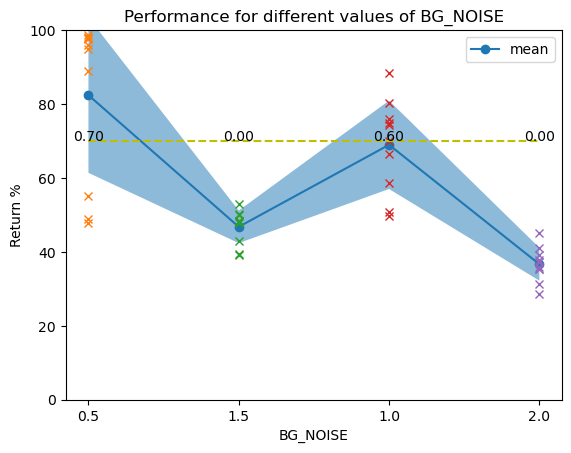

In [3]:
# def plot_returns(data, key):
for index, directory in enumerate(neighbouring_directories):
    if directory in data.keys():
        param = directory
        returns = 100*data[directory]
        n_values = len(parameter_values[directory])
        print(n_values)
        above_threshold = np.zeros(n_values)
        for i in range(n_values):
            above_threshold[i] = np.sum(returns[:,i] > 70)
        above_threshold /= returns.shape[0]
        plt.figure()
        means = np.mean(returns, axis=0)
        std = np.std(returns, axis=0)
        plt.plot(means, label='mean', marker='o')
        plt.fill_between(range(n_values), means-std, means+std, alpha=0.5)
        for i in range(n_values):
            plt.plot(i*np.ones_like(returns[:,i]), returns[:,i], 'x')
        plt.ylim(0, 100)
        for i in range(n_values):
            plt.text(i, 70, f"{above_threshold[i]:.2f}", ha='center')
        plt.hlines(70, 0, n_values - 1, colors='y', linestyles='dashed')
        plt.xticks(np.arange(n_values, step=1), labels = parameter_values[directory])
        plt.title(f'Performance for different values of {param}')
        plt.xlabel(param)
        plt.ylabel('Return %')
        plt.legend()
        plt.show()
